<a href="https://colab.research.google.com/github/ProfessorDong/Deep-Learning-Course-Examples/blob/master/ML_Examples/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification using Fashion-MNIST image data

In [1]:
import torch
print(torch.__version__)

from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


import numpy as np
import matplotlib.pyplot as plt

2.1.2


## Load image data

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

https://www.tensorflow.org/datasets/catalog/fashion_mnist

https://github.com/zalandoresearch/fashion-mnist

In [2]:
# Download train data from open datasets.
train_data= datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor(),)

# Download test data from open datasets.
test_data=datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor(),)

# Create data loaders.
train_dataloader=DataLoader(train_data, batch_size=64)
test_dataloader=DataLoader(test_data, batch_size=64)

In [3]:
train_dataloader.dataset.data.shape

torch.Size([60000, 28, 28])

Pixel values are between 0 and 255, 0 being black and 255 white (grey-scale image).

In [4]:
print(train_data.data.shape)
print(test_data.data.shape)
print(train_data.targets.shape)
print(test_data.targets.shape)

# Create training and test data from the datasets
train_images = train_dataloader.dataset.data
train_labels = train_dataloader.dataset.targets

test_images = train_dataloader.dataset.data
test_labels = train_dataloader.dataset.targets

print(train_images.shape)
print(test_images.shape)
# print(train_images[0,:])

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
torch.Size([60000])
torch.Size([10000])
torch.Size([60000, 28, 28])
torch.Size([60000, 28, 28])


Labels are integers from 0 to 9.  Each represents a specific article of clothing.

In [5]:
train_labels[:12] # First 12 training labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9])

In [6]:
print(train_data.classes)
class_names = train_data.classes

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


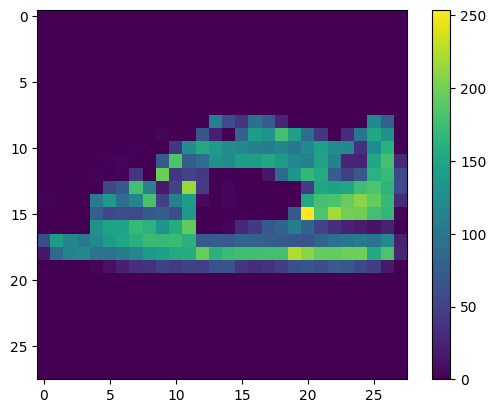

In [7]:
plt.figure()
plt.imshow(train_images[13])
plt.colorbar()
plt.grid(False)
plt.show()

## Data Preprocessing

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build the Model

In [9]:
class FashionModel(nn.Module):
    def __init__(self):
        super(FashionModel, self).__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.linear1(x))
        x = self.linear2(x)
        return x

# Instantiate the model
model = FashionModel()


## Set parameters for the Model

In [10]:
learning_rate = 0.01

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

## Train the Model

In [11]:
num_epochs = 25
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dataloader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/25], Loss: 0.4861
Epoch [2/25], Loss: 0.3945
Epoch [3/25], Loss: 0.3811
Epoch [4/25], Loss: 0.2989
Epoch [5/25], Loss: 0.2490
Epoch [6/25], Loss: 0.2295
Epoch [7/25], Loss: 0.2255
Epoch [8/25], Loss: 0.2375
Epoch [9/25], Loss: 0.2247
Epoch [10/25], Loss: 0.2294
Epoch [11/25], Loss: 0.1981
Epoch [12/25], Loss: 0.1964
Epoch [13/25], Loss: 0.2120
Epoch [14/25], Loss: 0.2239
Epoch [15/25], Loss: 0.2166
Epoch [16/25], Loss: 0.2360
Epoch [17/25], Loss: 0.2204
Epoch [18/25], Loss: 0.2045
Epoch [19/25], Loss: 0.1918
Epoch [20/25], Loss: 0.1714
Epoch [21/25], Loss: 0.2233
Epoch [22/25], Loss: 0.1846
Epoch [23/25], Loss: 0.1784
Epoch [24/25], Loss: 0.2200
Epoch [25/25], Loss: 0.2078


## Evaluate the Model

In [12]:
# Test the neural network
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the {} test images: {} %'.format(test_dataloader.dataset.data.shape[0], 100 * correct / total))

Accuracy of the network on the 10000 test images: 85.61 %


## Make a Prediction

Predicted class: 9
Label: Ankle boot


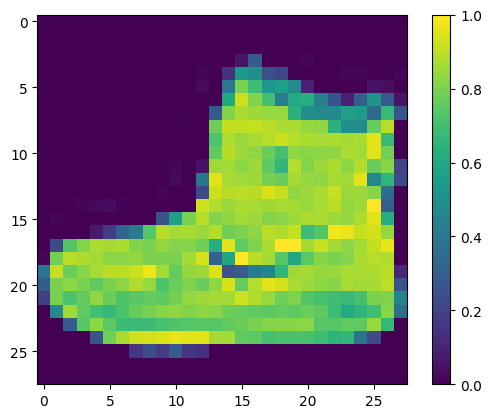

In [13]:
# Make predictions using the model
with torch.no_grad():
    predictions = model(test_images)

# Get the predicted class for the first image
predicted_class_idx = torch.argmax(predictions[0])  # Get index of highest probability class

# print(predicted_class_idx)
# print(predicted_class_idx.item())

# Print the predicted class and its label
print(f"Predicted class: {predicted_class_idx.item()}")
print(f"Label: {class_names[predicted_class_idx.item()]}")

# Display the first image
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

25


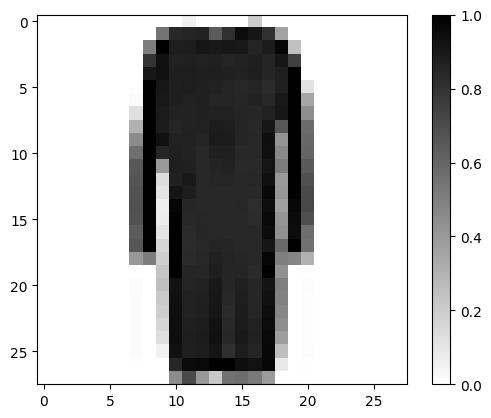

Correct label: Dress
Guessed label: Dress


In [15]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR 

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)  # Squeeze and use grayscale
  # plt.title("Corrected label: " + label)
  # plt.xlabel("Guessed label: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print("Correct label: " + label)
  print("Guessed label: " + guess)

def predict(model, image, label):
  with torch.no_grad():
      prediction = model(image.unsqueeze(0))  # Add batch dimension
  predicted_class = class_names[torch.argmax(prediction[0])]
  show_image(image, class_names[label], predicted_class)

def get_number():
  while True:
    num = input("Choose a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num < len(test_images):  # Check within valid range
        return int(num)
    else:
      print("Try again...")

num = get_number()
print(num)
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
